# Predicting H1N1 and FLU Vaccines

### Importing Necessary Libraries

In [206]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
df_features = pd.read_csv('data/training_set_features.csv')
df_labels = pd.read_csv('data/training_set_labels.csv')

In [176]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [177]:
df_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [178]:
df_features.shape

(26707, 36)

In [179]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [180]:
df_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [181]:
df_labels.shape

(26707, 3)

In [182]:
df = df_features.set_index('respondent_id').join(df_labels.set_index('respondent_id'))
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Deal with missing values

In [183]:
df.isnull().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For numerical columns (features), we will fill the NaN with the median.

In [184]:
df.fillna(df.median(),inplace=True)

In [185]:
df.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For categorical variables, we replace the missing values with the word 'unknown'.


In [186]:
df.replace(np.nan,'unknown',inplace=True)

In [187]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [188]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [189]:
'''
'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'education', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'
    
'''

"\n'behavioral_antiviral_meds', 'behavioral_avoidance',\n       'behavioral_face_mask', 'behavioral_wash_hands',\n       'behavioral_large_gatherings', 'behavioral_outside_home',\n       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',\n       'chronic_med_condition', 'child_under_6_months', 'health_worker',\n       'health_insurance', 'education', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children', 'employment_industry',\n       'employment_occupation'\n    \n"

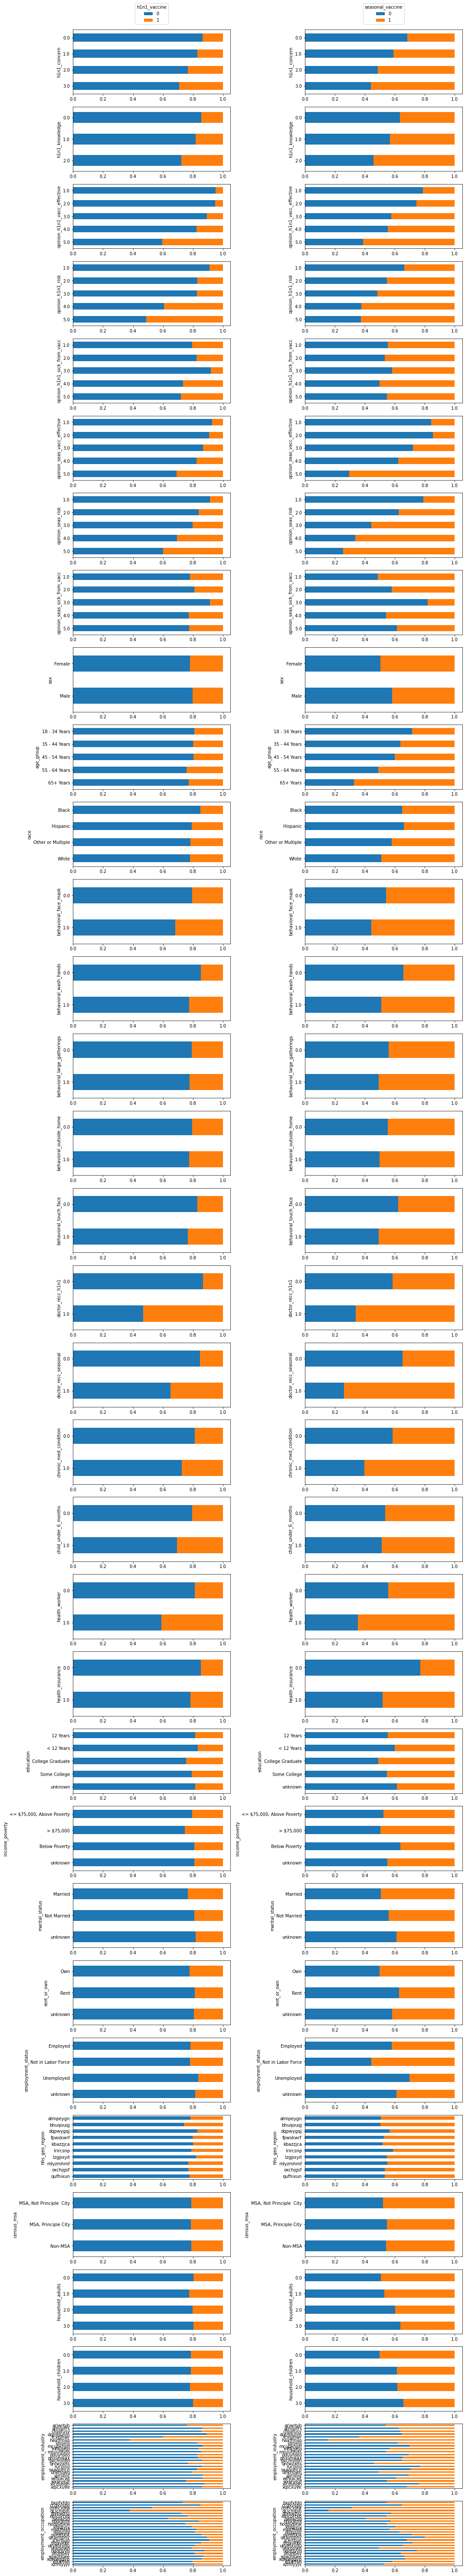

In [190]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

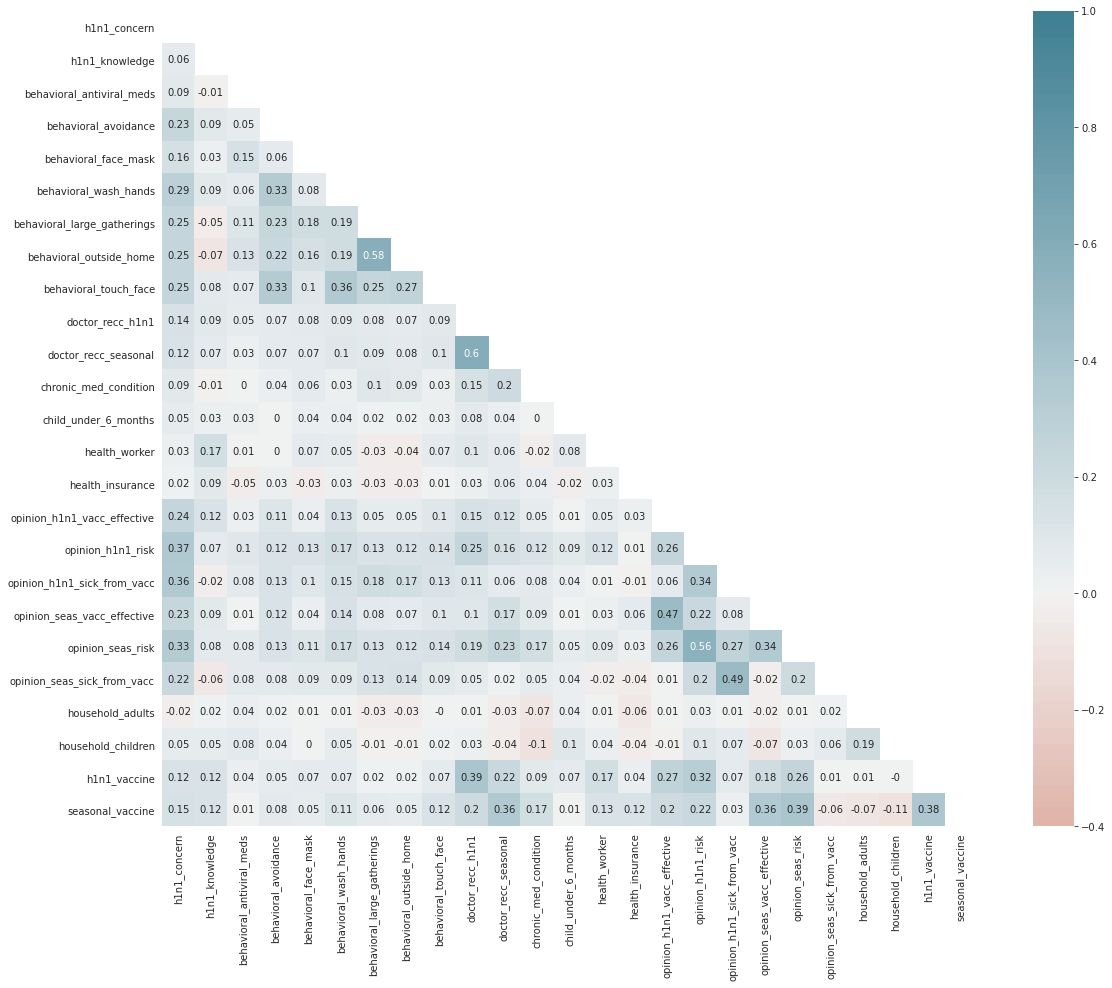

In [191]:
# import seaborn as sns
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1)

corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n = 200),annot= True, 
                     xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values,
                     vmin = -.4,
                     vmax = 1,
                     center = 0,
                     mask=mask, square=True)

In [192]:
(df=='unknown').sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [193]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'behavioral_large_gatherings',
                    'census_msa',
                    ])
                               

In [194]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,4.0,2.0,4.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.0,4.0,1.0,65+ Years,12 Years,Female,Not Married,Rent,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,4.0,45 - 54 Years,Some College,Female,Married,Own,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,2.0,2.0,65+ Years,Some College,Female,Not Married,Own,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,1.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,5.0,4.0,2.0,55 - 64 Years,Some College,Female,Not Married,Own,0,1


In [195]:
df_2.dtypes


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
sex                             object
marital_status                  object
rent_or_own                     object
h1n1_vaccine             

In [196]:
(df_2=='unknown').sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
sex                               0
marital_status                 1408
rent_or_own                    2042
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

### Other option for categorical to numerical transformation: One hot encoding:


In [197]:
df_3=pd.get_dummies(df_2,drop_first=True)
df_3

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_unknown,sex_Male,marital_status_Not Married,marital_status_unknown,rent_or_own_Rent,rent_or_own_unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,1,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [198]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "unknown", value = 2)

# encoder=LabelEncoder()
# df_2['rent_or_own']=encoder.fit_transform(df_2['rent_or_own'])

In [199]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "unknown", value = 2)



# encoder=LabelEncoder()
# df_2['marital_status']=encoder.fit_transform(df_2['marital_status'])

In [200]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)

# encoder=LabelEncoder()
# df_2['sex']=encoder.fit_transform(df_2['sex'])

In [201]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)
df_2['education'] = df_2['education'].replace(to_replace = "unknown", value = 4)

# encoder=LabelEncoder()
# df_2['education']=encoder.fit_transform(df_2['education'])

In [202]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

# encoder=LabelEncoder()
# df_2['age_group']=encoder.fit_transform(df_2['age_group'])

In [203]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
 8   doctor_recc_h1n1             26707 non-null  float64
 9   doctor_recc_seasonal         26707 non-null  float64
 10  chronic_med_condition        26707 non-null  float64
 11  child_under_6_months         26707 non-null  float64
 12  health_worker                26707 non-null  float64
 13  health_insurance

## Train Model - H1N1 

In [204]:
## Train model
X = df_2.drop("h1n1_vaccine", axis=1)
y = df_2["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Smote

In [208]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

## Decision Tree - H1N1

In [209]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [210]:
y_test_pred=tree_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7790924067695073


In [211]:
y_score=tree_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.6723941047850572


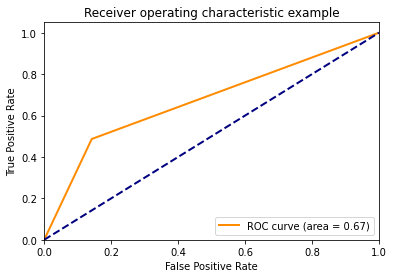

In [212]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [213]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.78416323, 0.77592662, 0.78374836, 0.78393559, 0.7809399 ])

In [214]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.781742741439656


## Random Forest - H1N1

### RF Model 1

In [215]:
## Train model
rf_model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [216]:
y_test_pred=rf_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.842444211472218


In [217]:
y_score=rf_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8712019350492729


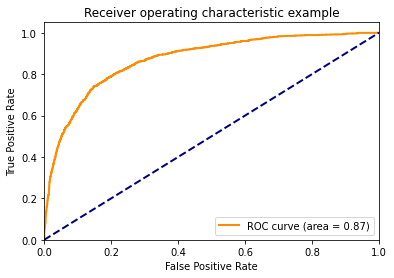

In [218]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### RF Model 2

In [304]:
## Train model
rf_model_2 = RandomForestClassifier(n_estimators=500,min_samples_leaf=4, max_depth=15,max_features=.2, random_state=42)
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=0.2, min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [305]:
y_test_pred=rf_model_2.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.845589336528381


In [306]:
y_score=rf_model_2.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8719259567822555


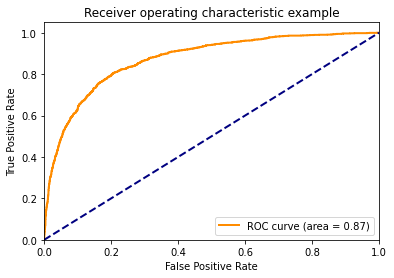

In [307]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Sorting the features based on their importance from most to least 

In [279]:
features=X_train.columns
index_importances=rf_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'seasonal_vaccine', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'doctor_recc_seasonal', 'opinion_seas_risk',
       'health_worker', 'opinion_seas_vacc_effective', 'h1n1_knowledge',
       'h1n1_concern', 'chronic_med_condition', 'behavioral_touch_face',
       'behavioral_outside_home', 'behavioral_wash_hands',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc',
       'behavioral_avoidance', 'age_group', 'education', 'rent_or_own',
       'behavioral_face_mask', 'child_under_6_months', 'sex',
       'health_insurance', 'marital_status', 'behavioral_antiviral_meds'],
      dtype='object')

In [224]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,rf_model.feature_importances_[ii])

h1n1_concern 0.02589996671760982
h1n1_knowledge 0.03618434431437744
behavioral_antiviral_meds 0.0029312816790549377
behavioral_avoidance 0.011503991940505252
behavioral_face_mask 0.0051131905866498234
behavioral_wash_hands 0.012382273607398252
behavioral_outside_home 0.013753996722068814
behavioral_touch_face 0.013835009203011693
doctor_recc_h1n1 0.21684324931461096
doctor_recc_seasonal 0.07106888972308578
chronic_med_condition 0.014132200112534478
child_under_6_months 0.004881536076170833
health_worker 0.042795439413897275
health_insurance 0.003291047309024049
opinion_h1n1_vacc_effective 0.1375765341266093
opinion_h1n1_risk 0.0984626832320374
opinion_h1n1_sick_from_vacc 0.01214870832587211
opinion_seas_vacc_effective 0.04226970469466243
opinion_seas_risk 0.044620836307325926
opinion_seas_sick_from_vacc 0.012123027506702636
age_group 0.009800444473987945
education 0.0059113219710105235
sex 0.0037822607449536517
marital_status 0.0032738354571418245
rent_or_own 0.005413694301753638
seaso

## ADA Boost  - H1N1

In [225]:
## Train model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train,y_train)

AdaBoostClassifier()

In [226]:
y_test_pred=ab_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.838700014976786


In [227]:
y_score=ab_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8613793914089366


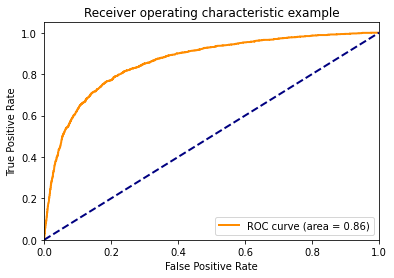

In [228]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost  - H1N1

### GB Model 1 - H1N1

In [229]:
## Train model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [230]:
y_test_pred=gb_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8521791223603414


In [231]:
y_score=gb_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8693749261168122


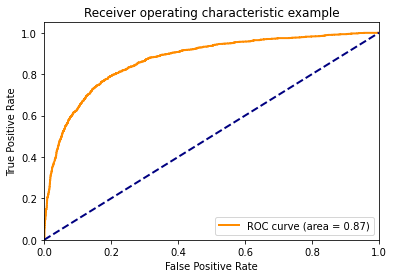

In [232]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 2  - H1N1

In [233]:
gb_2_model = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [234]:
y_test_pred=gb_2_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8467874794069192


In [235]:
y_score=gb_2_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8723076698321508


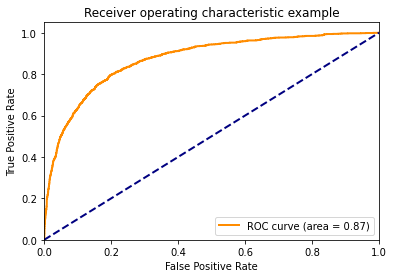

In [236]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - H1N1 - BEST H1N1 MODEL

In [237]:
gb_3_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5)
gb_3_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75)

In [238]:
y_test_pred=gb_3_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8523288902201588


In [239]:
y_score=gb_3_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8739690195898676


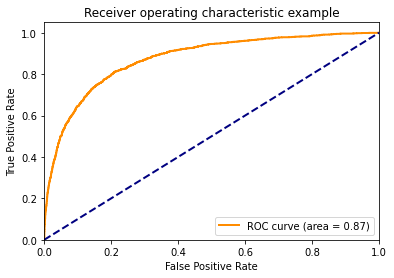

In [240]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [355]:
## Sort the features based on their importance from most important to least important
features=X_train.columns
index_importances=gb_3_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'seasonal_vaccine', 'opinion_h1n1_vacc_effective',
       'doctor_recc_seasonal', 'opinion_h1n1_risk', 'health_worker',
       'h1n1_knowledge', 'behavioral_outside_home', 'h1n1_concern',
       'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc',
       'chronic_med_condition', 'opinion_seas_risk',
       'opinion_h1n1_sick_from_vacc', 'behavioral_touch_face',
       'behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_face_mask',
       'child_under_6_months', 'age_group', 'rent_or_own', 'health_insurance',
       'education', 'behavioral_antiviral_meds', 'sex', 'marital_status'],
      dtype='object')

In [356]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,gb_3_model.feature_importances_[ii])

h1n1_concern 0.017572440478397764
h1n1_knowledge 0.023053014738249097
behavioral_antiviral_meds 0.0009267307091183485
behavioral_avoidance 0.0060223801667379515
behavioral_face_mask 0.004620372716184453
behavioral_wash_hands 0.004740735717518998
behavioral_outside_home 0.02153244091255321
behavioral_touch_face 0.00872019510622944
doctor_recc_h1n1 0.3376581627580409
doctor_recc_seasonal 0.08394465252730154
chronic_med_condition 0.012072438850652375
child_under_6_months 0.004180944694057397
health_worker 0.039766538921535685
health_insurance 0.0016137321981872026
opinion_h1n1_vacc_effective 0.1366949722303698
opinion_h1n1_risk 0.08215096020252906
opinion_h1n1_sick_from_vacc 0.011353366279039176
opinion_seas_vacc_effective 0.017535711101844192
opinion_seas_risk 0.011665295710384124
opinion_seas_sick_from_vacc 0.013194033180140723
age_group 0.0030259284432442184
education 0.0012795968835498349
sex 0.0006834115759285742
marital_status 0.0005160705188162243
rent_or_own 0.0024641300013014313


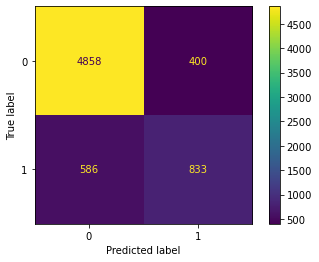

In [357]:
plot_confusion_matrix(gb_3_model,X_test,y_test)

### GB Model 4 - H1N1 

In [247]:
gb_4_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [248]:
y_test_pred=gb_4_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8527781937996106


In [249]:
y_score=gb_4_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8737635539629399


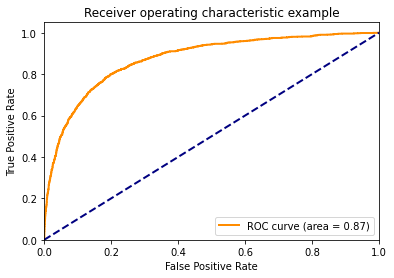

In [250]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [251]:
## Sort the features based on their importance from most important to least important
features=X_train.columns
index_importances=gb_4_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'seasonal_vaccine', 'opinion_h1n1_vacc_effective',
       'doctor_recc_seasonal', 'opinion_h1n1_risk', 'health_worker',
       'h1n1_knowledge', 'behavioral_outside_home',
       'opinion_seas_vacc_effective', 'h1n1_concern',
       'opinion_seas_sick_from_vacc', 'chronic_med_condition',
       'opinion_seas_risk', 'opinion_h1n1_sick_from_vacc',
       'behavioral_touch_face', 'behavioral_avoidance',
       'behavioral_wash_hands', 'behavioral_face_mask', 'child_under_6_months',
       'age_group', 'rent_or_own', 'health_insurance', 'education',
       'behavioral_antiviral_meds', 'sex', 'marital_status'],
      dtype='object')

In [252]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,gb_4_model.feature_importances_[ii])

h1n1_concern 0.01721508336561122
h1n1_knowledge 0.023016481268572492
behavioral_antiviral_meds 0.0009766347524207016
behavioral_avoidance 0.0060049845614380615
behavioral_face_mask 0.004634139730179826
behavioral_wash_hands 0.00483170443659124
behavioral_outside_home 0.021657386054751343
behavioral_touch_face 0.00874046062396552
doctor_recc_h1n1 0.33773347783731267
doctor_recc_seasonal 0.08403665547805944
chronic_med_condition 0.01210545597056263
child_under_6_months 0.004215344673897696
health_worker 0.03981707881527681
health_insurance 0.0015452812338070893
opinion_h1n1_vacc_effective 0.13668946904048077
opinion_h1n1_risk 0.08226956739721325
opinion_h1n1_sick_from_vacc 0.011456900838928698
opinion_seas_vacc_effective 0.017518545459944374
opinion_seas_risk 0.011710474142955993
opinion_seas_sick_from_vacc 0.0129616370054312
age_group 0.0029901112531383204
education 0.001191430038316834
sex 0.0006962776340083396
marital_status 0.0005148106903129445
rent_or_own 0.002392062972970724
seaso

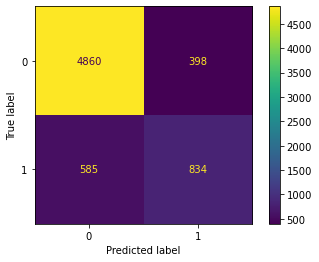

In [253]:
plot_confusion_matrix(gb_4_model,X_test,y_test)

### GB Model 5 - H1N1

In [348]:
gb_5_model = GradientBoostingClassifier(n_estimators=150, max_depth= 5, min_samples_split= 6, 
                                        min_samples_leaf=4)
gb_5_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                           n_estimators=150)

In [349]:
y_test_pred=gb_5_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.852478658079976


In [350]:
y_score=gb_5_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8727911104820709


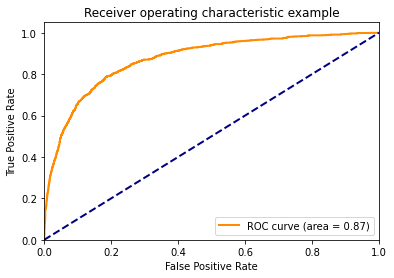

In [351]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Voting Classifier  - H1N1

In [259]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [260]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [261]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [262]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.845589336528381


## Train Model - Seasonal 

In [70]:
## Train model
X = df_2.drop("seasonal_vaccine", axis=1)
y = df_2["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Decision Tree - Seasonal 

In [71]:
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_model_seasonal.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [72]:
y_test_pred=tree_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7100494233937397


In [73]:
y_score=tree_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.7087071456079342


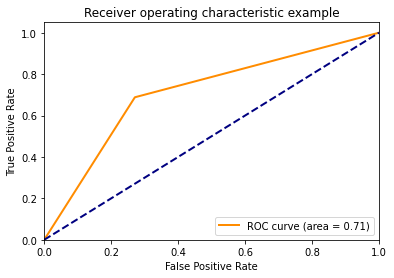

In [74]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [75]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.70872332, 0.71153126, 0.71147725, 0.71503464, 0.70866879])

In [76]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.711087052814593


## Random Forest - Seasonal 

In [77]:
## Train model
rf_model_seasonal = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model_seasonal.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [78]:
y_test_pred=rf_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7976636213868504


In [79]:
y_score=rf_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8746980504307617


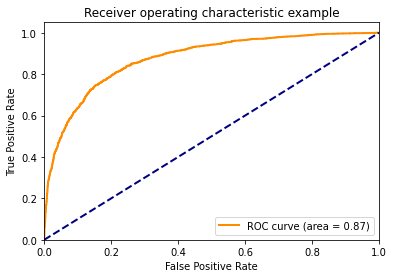

In [80]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## ADA Boost - Seasonal 

In [81]:
## Train model
ab_model_seasonal = AdaBoostClassifier()
ab_model_seasonal.fit(X_train,y_train)

AdaBoostClassifier()

In [82]:
y_test_pred=ab_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7955668713494084


In [83]:
y_score=ab_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8724783898042282


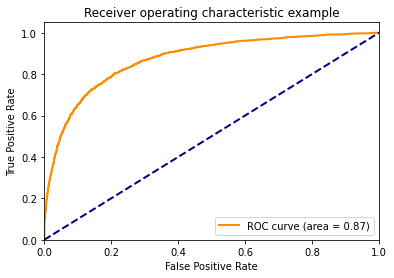

In [84]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost - Seasonal 

### GB Model 1 - Seasonal 

In [85]:
## Train model
gb_model_seasonal = GradientBoostingClassifier()
gb_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier()

In [86]:
y_test_pred=gb_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8051520143777146


In [87]:
y_score=gb_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8789769539323848


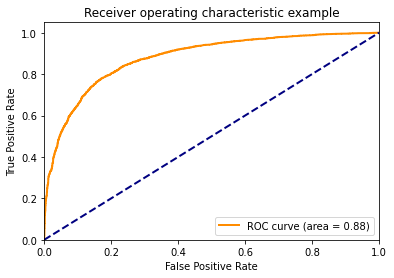

In [88]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 2 - Seasonal 

In [89]:
gb_2_model_seasonal = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [90]:
y_test_pred=gb_2_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8030552643402725


In [91]:
y_score=gb_2_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8784777612947798


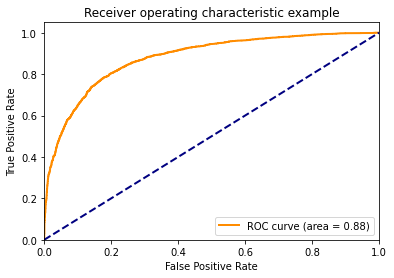

In [92]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - Seasonal 

In [93]:
gb_3_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5)
gb_3_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75)

In [94]:
y_test_pred=gb_3_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.805900853676801


In [95]:
y_score=gb_3_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8794179111850882


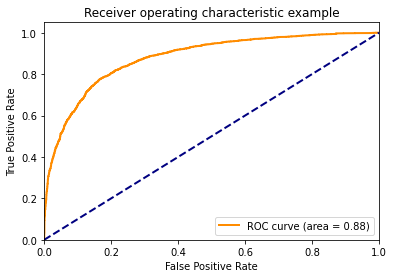

In [96]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 4 - Seasonal 

In [97]:
gb_4_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [98]:
y_test_pred=gb_4_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8054515500973491


In [99]:
y_score=gb_4_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.879851386182456


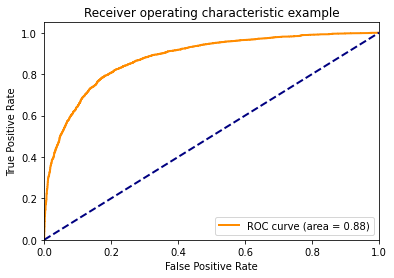

In [100]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 5 - Seasonal  - BEST MODEL FOR SEASONAL VACCINE

In [101]:
gb_5_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8, 
                                        min_samples_leaf=2, verbose = 3)
gb_5_model_seasonal.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3074            3.13s
         2           1.2467            2.93s
         3           1.1965            2.80s
         4           1.1542            2.70s
         5           1.1183            2.64s
         6           1.0878            2.63s
         7           1.0614            2.61s
         8           1.0390            2.57s
         9           1.0195            2.52s
        10           1.0019            2.47s
        11           0.9864            2.41s
        12           0.9728            2.39s
        13           0.9608            2.36s
        14           0.9501            2.32s
        15           0.9402            2.28s
        16           0.9317            2.23s
        17           0.9240            2.19s
        18           0.9167            2.16s
        19           0.9101            2.12s
        20           0.9037            2.09s
        21           0.8981            2.05s
        2

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                           n_estimators=75, verbose=3)

In [102]:
y_test_pred=gb_5_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8041036393589935


In [103]:
y_score=gb_5_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8800550297343023


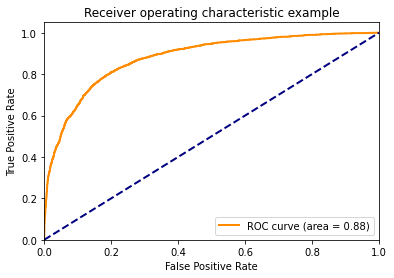

In [104]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

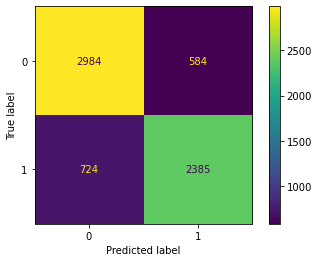

In [121]:
plot_confusion_matrix(gb_5_model_seasonal,X_test,y_test)

## Voting Classifier - Seasonal 

In [105]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [106]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [107]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [108]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8029054964804553
